# OVERVIEW
I am going to build a machine learning model that examines how various factors impact the performance index of students. The model will analyze key variables such as hours studied, previous scores, participation in extracurricular activities, sleep hours, and the number of sample question papers practiced. By feeding these factors into the model, I aim to decipher the relationships that influence student performance. The goal is to predict how adjustments in these variables might affect the performance index, providing insights into how different study habits and lifestyle choices contribute to academic success.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading in and displaying the dataset
students = pd.read_csv('Student_Performance.csv')
students.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [3]:
#checking the count of rows and columns
students.shape

(10000, 6)

### DATA WRANGLING / EDA

In [4]:
#cheking for the count of null values for each colums
students.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
#checking the statistics and distribution of the target variable column 
students['Performance Index'].describe()

count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64

In [6]:
#checking the statistics and distribution of continous variable feature column
students['Previous Scores'].describe()

count    10000.000000
mean        69.445700
std         17.343152
min         40.000000
25%         54.000000
50%         69.000000
75%         85.000000
max         99.000000
Name: Previous Scores, dtype: float64

In [7]:
#checking for the count of unique values in each columns
students.nunique()

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

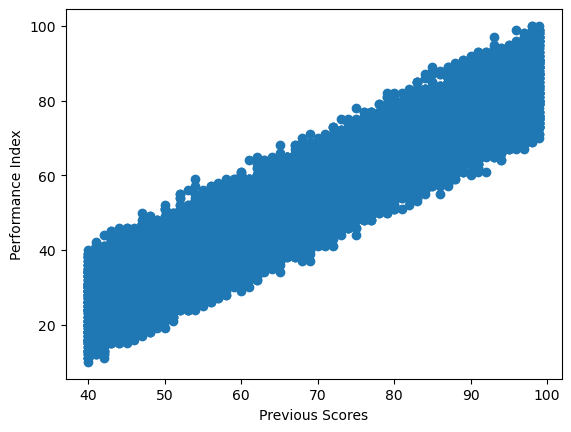

<Figure size 800x300 with 0 Axes>

In [8]:
#creating a scatter plot 
X = students['Previous Scores']
Y = students['Performance Index']
plt.scatter(X,Y)
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.figure(figsize= (8,3))
plt.show()

In [9]:
#Encoding the categorical column 'Extracurricular Activities' using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
ohetransform = ohe.fit_transform(students[['Extracurricular Activities']])
ohetransform

,Extracurricular Activities_No,Extracurricular Activities_Yes
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
9995,0.0,1.0
9996,0.0,1.0
9997,0.0,1.0
9998,0.0,1.0


In [10]:
#merging the encoded columns into the original dataset
students = pd.concat([students, ohetransform], axis = 1).drop(columns = ['Extracurricular Activities'])
students

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0.0,1.0
1,4,82,4,2,65.0,1.0,0.0
2,8,51,7,2,45.0,0.0,1.0
3,5,52,5,2,36.0,0.0,1.0
4,7,75,8,5,66.0,1.0,0.0
...,...,...,...,...,...,...,...
9995,1,49,4,2,23.0,0.0,1.0
9996,7,64,8,5,58.0,0.0,1.0
9997,6,83,8,5,74.0,0.0,1.0
9998,9,97,7,0,95.0,0.0,1.0


In [11]:
students.rename(columns = ({'Extracurricular Activities_No': 'No_Extracurricular_Activity', 'Extracurricular Activities_Yes': 'Having_Extracurricular_Activities'}), inplace = True)

In [12]:
#checking the new Dataframe
students

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,No_Extracurricular_Activity,Having_Extracurricular_Activities
0,7,99,9,1,91.0,0.0,1.0
1,4,82,4,2,65.0,1.0,0.0
2,8,51,7,2,45.0,0.0,1.0
3,5,52,5,2,36.0,0.0,1.0
4,7,75,8,5,66.0,1.0,0.0
...,...,...,...,...,...,...,...
9995,1,49,4,2,23.0,0.0,1.0
9996,7,64,8,5,58.0,0.0,1.0
9997,6,83,8,5,74.0,0.0,1.0
9998,9,97,7,0,95.0,0.0,1.0


In [13]:
#importing libraries and splitting the dataset to training and testing dataset 
from sklearn.model_selection import train_test_split
X = students.drop(columns = 'Performance Index')
y = students['Performance Index']

In [14]:
#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 18, test_size = 0.2)

In [15]:
#checking the shape of the training and testing set
print('X_train rows and columns = ', X_train.shape)
print('y_train rows and columns = ', y_train.shape)

X_train rows and columns =  (8000, 6)
y_train rows and columns =  (8000,)


In [16]:
#importing libraries for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
#fitting the dataset into the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
#checking the root mean square error
mse

4.354633103403296

In [19]:
#checking the r_squared value
r2

0.9881796355720308

In [23]:
#checking the predicted values for the testing set
y_pred

array([29.38587002, 55.15373168, 64.0276463 , ..., 49.91553382,
       73.18991727, 36.22462681])

In [25]:
#checking the actual values of the testing set
y_test

367     30.0
5652    53.0
8942    65.0
5811    25.0
3890    56.0
        ... 
2614    63.0
1287    80.0
3034    48.0
2924    74.0
6189    35.0
Name: Performance Index, Length: 2000, dtype: float64

In [20]:
#creating a regression table using statsmodel
import statsmodels.api as sm
X_train_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_constant).fit()
regression_table = model.summary()
print(regression_table)

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.423e+05
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        08:11:40   Log-Likelihood:                -16997.
No. Observations:                8000   AIC:                         3.401e+04
Df Residuals:                    7994   BIC:                         3.405e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

### INFERENCE

###### R-squared (0.989): 
This indicates that 98.9% of the variance in the Performance Index is explained by the model. 
In other words, the independent variables are highly predictive of the performance index.

###### F-statistic (1.423e+05, Prob > F = 0.00): 
The F-statistic is very large, and its associated p-value is effectively 0. 
This means the overall model is statistically significant, implying that the factors collectively have a meaningful impact on 
performance.

###### Coefficients (coef): 
These represent the influence of each independent variable on the Performance Index. For each unit increase in these variables, the effect on the Performance Index is as follows:

    Hours Studied (2.8534): Each additional hour studied increases the Performance Index by 2.85 points, showing a 
    strong positive influence.
    Previous Scores (1.0186): Previous exam scores have a substantial effect; for every point increase in previous scores, 
    the Performance Index increases by about 1.02 points.
    Sleep Hours (0.4754): More sleep is associated with better performance, though the effect is moderate.
    Sample Question Papers Practiced (0.1898): Practicing more papers improves performance, but to a smaller degree 
    than studying or previous scores.
    No Extracurricular Activities (-11.5281): Students not involved in extracurricular activities have a significant 
    decrease in their Performance Index by about 11.53 points.
    Having Extracurricular Activities (-10.9509): Interestingly, participating in extracurricular activities also 
    has a negative coefficient, although slightly less than for those not participating. 
    This suggests a negative impact, which may reflect a trade-off between time spent on extracurriculars and studying.
    
###### P-values (P>|t|): 
All the p-values are 0.000, indicating that each variable's contribution to the model is statistically significant.

###### Intercept (const = -22.4790): 
This is the baseline value of the Performance Index when all independent variables are zero. It’s negative, but since this scenario is unrealistic (e.g., zero hours studied, zero previous scores), the intercept is more of a starting point for the model’s predictions.

## CONCLUSION
The model shows that Hours Studied, Previous Scores, and Sample Question Papers Practiced have positive and significant impacts on student performance. Sleep Hours also plays a role but to a lesser extent. Interestingly, both participation and non-participation in extracurricular activities have negative coefficients, potentially suggesting that other factors (like time management) may need to be balanced with studying.